In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import seaborn as sns

The following function models the collisions which take place between the particles, depending on the number of particles and the number of collisions. To represent each collision, two distinct elements in the array representing the particles are chosen. Depending on the species of these two particles, they are replaced by the relevant species. 

In [2]:
def collisions(n,k):
   store=0
   particles=np.zeros(n)
   for i in range (n): 
      particles[i]=np.random.randint(1,4)
     
   no_1s=0
   no_2s=0
   no_3s=0
   for i in range(k):
      var_1=np.random.randint(0,n)
      store=particles[var_1]
      particles[var_1]=-1
      var_2=np.random.randint(0,n)
      while (particles[var_2]==-1):
         var_2=np.random.randint(0,n)
      particles[var_1]=store
      if ((particles[var_1]+particles[var_2])%3==1):
         particles[var_1]=2
         particles[var_2]=2
      if ((particles[var_1]+particles[var_2])%3==0):
         particles[var_1]=3
         particles[var_2]=3
      if ((particles[var_1]+particles[var_2])%3==2):
         particles[var_1]=1
         particles[var_2]=1

   for i in range(n):
      if (particles[i]==3):
         no_3s=no_3s+1
      if (particles[i]==1):
         no_1s=no_1s+1
      if (particles[i]==2):
         no_2s=no_2s+1
   
   return no_1s, no_2s, no_3s
    

To start modelling the procedure I consider the simple case with 3 particles and 10 collisions. I find the number of particles of each species after these collisions.

In [3]:
total_1s, total_2s, total_3s=collisions(3,10)  
print("Totals of species A,B,C respectively after 10 collisions: " ,total_1s, total_2s, total_3s)

Totals of species A,B,C respectively after 10 collisions:  2 0 1


I am interested in determining how likely we are to be left with 4 particles of a single species after a large number of collisions with 4 particles. Therefore, I perform 100 trials of 100000 collisions and output how many of these do not give 4 particles of a single species.

In [4]:
number_not_converge=0
number_to_1s=0
number_to_2s=0
number_to_3s=0
for i in range(100):
    ones,twos,threes=collisions(4,100000)
    if (ones==4):
        number_to_1s=number_to_1s+1
    if (twos==4):
        number_to_2s=number_to_2s+1
    if (threes==4):
        number_to_3s=number_to_3s+1
    if ((ones<4) and (twos<4) and (threes<4)):
        number_not_converge=number_not_converge+1

print("Number of trials without convergence to a single species: " ,number_not_converge)
print("Number of trials in which we converge to species A, B, C respectively: " ,number_to_1s, number_to_2s,number_to_3s)


Number of trials without convergence to a single species:  0
Number of trials in which we converge to species A, B, C respectively:  33 35 32


Here I am interested in finding how likely we are to converge to a single species depending on the value of P, with a large value of C. So, I fix C=1000 and run 100 trials of C collisions for each value of P from 4 up to 100. From these results, I find the likelihood of converging to a single species for each value of P. I produce a scatter plot of my results.

In [5]:
def convergence(P):
    number_not_converge=0
    number_to_1s=0
    number_to_2s=0
    number_to_3s=0
    for i in range(100):
        ones,twos,threes=collisions(P,1000)
        if (ones==P):
            number_to_1s=number_to_1s+1
        if (twos==P):
            number_to_2s=number_to_2s+1
        if (threes==P):
            number_to_3s=number_to_3s+1
        if ((ones<P) and (twos<P) and (threes<P)):
            number_not_converge=number_not_converge+1
    return number_to_1s, number_to_2s, number_to_3s, number_not_converge

trials=np.zeros(96)
for i in range(4,100): 
    numberA,numberB,numberC,numbernone=convergence(i)
    trials[i-4]=(numberA+numberB+numberC)/100

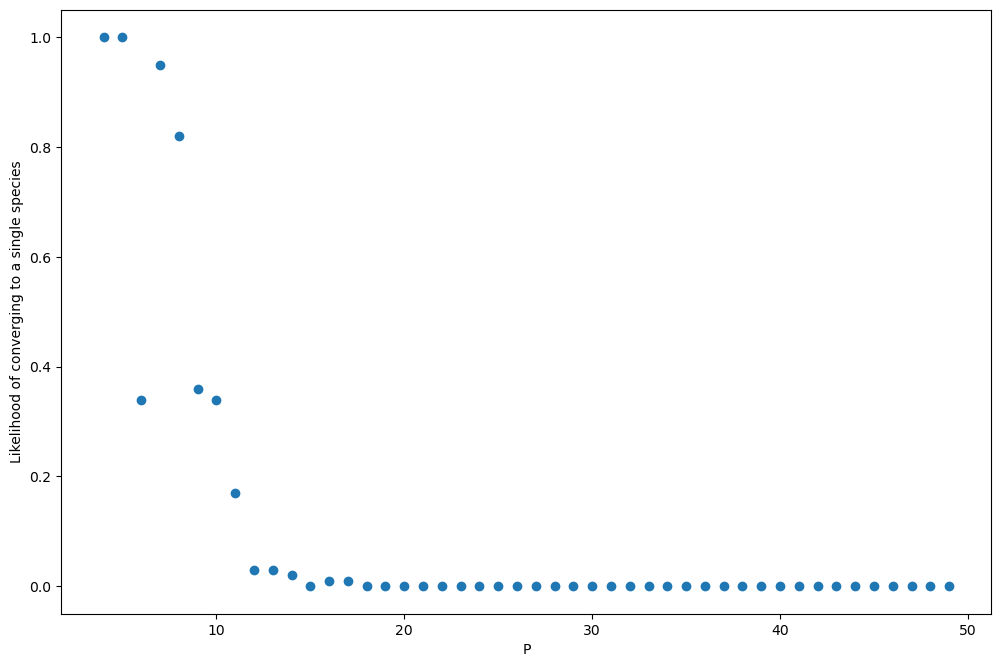

In [6]:
x=np.zeros(46)
y=np.zeros(46)
for i in range(46): 
    x[i]=i+4
    y[i]=trials[i]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("P")
plt.ylabel("Likelihood of converging to a single species")
plt.scatter(x, y)
plt.show()

I am interested in investigating how the phenomena I observed of convergence to a single species with P=4 depends on C. Therefore, I find the percentage of 1000 trials of C collisions, with C varying from 1 to 200, for which we end with 4 particles of a single species. I plot a scatter plot showing my results.

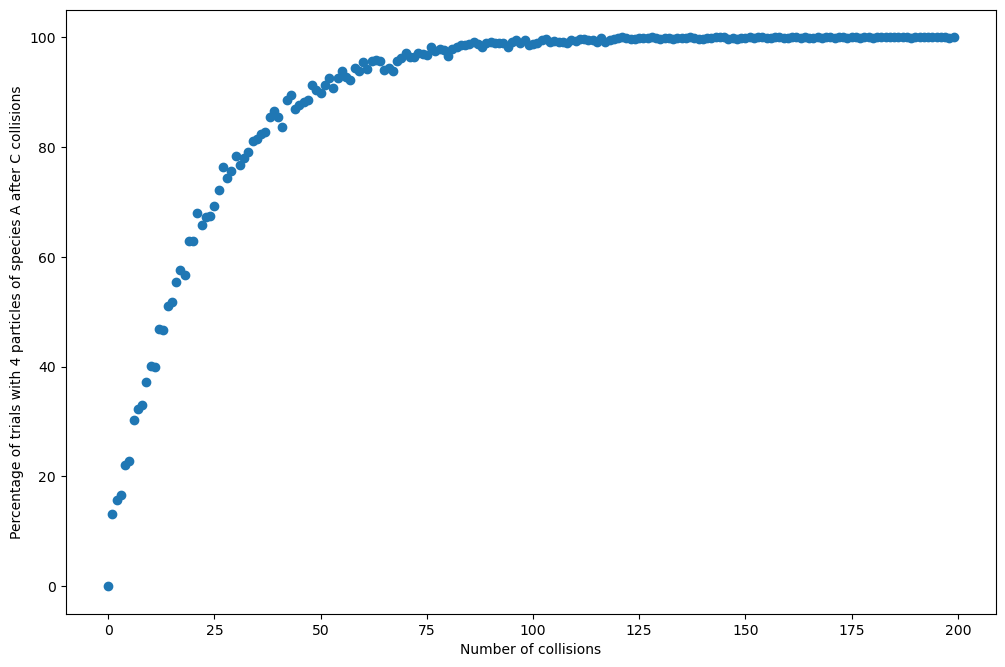

In [7]:
results=np.zeros(200)
converge_A=np.zeros(200)
converge_B=np.zeros(200)
converge_C=np.zeros(200)
for k in range (1,200): 
    number_not_converge=0
   
    for i in range(1000):
      Not_converge=False
      ones,twos,threes=collisions(4,k)
      if (ones==4):
         converge_A[k]=converge_A[k]+1
      if (twos==4):
         converge_B[k]=converge_B[k]+1
      if (threes==4):
         converge_C[k]=converge_C[k]+1
      if ((ones<4) and (twos<4) and (threes<4)):
        Not_converge=True
        number_not_converge=number_not_converge+1
    results[k]=(1000-number_not_converge)/10

x=np.zeros(200)
for i in range(1,200):
    x[i]=i

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Number of collisions")
plt.ylabel("Percentage of trials with 4 particles of species A after C collisions")
plt.scatter(x,results)
plt.show()
    

I find the percentage differences in the start and end number of particles of each species, where C=1000 and P=1000. This is for the particles randomly assigned to species at the start. 

In [8]:
def collisions(n,k):
   no_1s=0
   no_2s=0
   no_3s=0
   store=0
   particles=np.zeros(n)
   for i in range (n): 
      particles[i]=np.random.randint(1,4)
   for i in range(n):
      if (particles[i]==3):
         no_3s=no_3s+1
      if (particles[i]==1):
         no_1s=no_1s+1
      if (particles[i]==2):
         no_2s=no_2s+1
   no_1s_after=0
   no_2s_after=0
   no_3s_after=0
   for i in range(k):
      var_1=np.random.randint(n)
      store=particles[var_1]
      particles[var_1]=-1
      var_2=np.random.randint(0,n)
      while (particles[var_2]==-1):
         var_2=np.random.randint(0,n)
      particles[var_1]=store
      if ((particles[var_1]+particles[var_2])%3==1):
         particles[var_1]=2
         particles[var_2]=2
      if ((particles[var_1]+particles[var_2])%3==0):
         particles[var_1]=3
         particles[var_2]=3
      if ((particles[var_1]+particles[var_2])%3==2):
         particles[var_1]=1
         particles[var_2]=1
   for i in range(n):
      if (particles[i]==3):
         no_3s_after=no_3s_after+1
      if (particles[i]==1):
         no_1s_after=no_1s_after+1
      if (particles[i]==2):
         no_2s_after=no_2s_after+1
   return no_1s, no_2s, no_3s, no_1s_after, no_2s_after, no_3s_after

Percentage differences for A,B,C respectively:  0.0002705871741679444 0.0024293683642253013 0.0026948528310926133


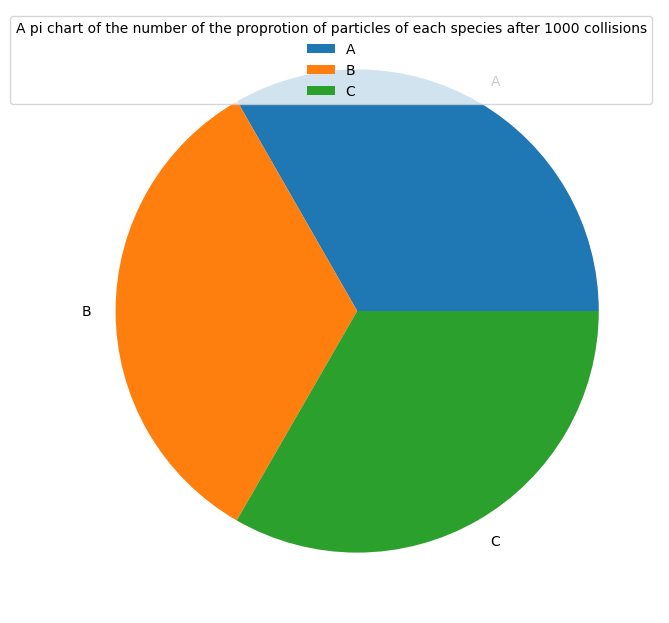

<Figure size 432x288 with 0 Axes>

In [9]:

total_1s, total_2s, total_3s, total_1s_after, total_2s_after, total_3s_after=collisions(100000,1000000)
y=np.array([total_1s_after, total_2s_after, total_3s_after])
diff_1=np.abs(total_1s_after-total_1s)/ total_1s
diff_2=np.abs(total_2s_after-total_2s)/ total_2s
diff_3=np.abs(total_3s_after-total_3s)/ total_3s
print('Percentage differences for A,B,C respectively: ' ,diff_1, diff_2, diff_3)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
labels= 'A', 'B', 'C'
plt.pie(y, labels=labels)
plt.legend(title= 'A pi chart of the number of the proprotion of particles of each species after 1000 collisions')
plt.show()
plt.savefig("Project pi chart")

In [10]:
results=np.zeros((100,3))
for i in range(100):
    total_1s, total_2s, total_3s, total_1s_after, total_2s_after, total_3s_after=collisions(10000,10000)
    diff_1=np.abs(total_1s_after-total_1s)/ total_1s
    diff_2=np.abs(total_2s_after-total_2s)/ total_2s
    diff_3=np.abs(total_3s_after-total_3s)/ total_3s
    results[i][0]=diff_1
    results[i][1]=diff_2
    results[i][2]=diff_3

average_change_A=0
average_change_B=0
average_change_C=0

for i in range (100):
    average_change_A=average_change_A+results[i][0]
    average_change_B=average_change_B+results[i][1]
    average_change_C=average_change_C+results[i][2]
average_change_A=average_change_A/100
average_change_B=average_change_B/100
average_change_C=average_change_C/100

print("Average changes for particles of species A, B, C respectively: " ,average_change_A, average_change_B, average_change_C)

Average changes for particles of species A, B, C respectively:  0.01778598002061742 0.014454979836707474 0.01700884946924131


I now keep the number of collisions fixed and vary the number of particles up to 1000. For each value of P, I find the percentage of particles of each species following 1000 collisions. I produce a scatter plot to represent my findings for species A.

In [11]:
def collisions(n,k):
   store=0
   particles=np.zeros(n)
   for i in range (n): 
      particles[i]=np.random.randint(1,4)
     
   no_1s=0
   no_2s=0
   no_3s=0
   for i in range(k):
      var_1=np.random.randint(0,n)
      store=particles[var_1]
      particles[var_1]=-1
      var_2=np.random.randint(0,n)
      while (particles[var_2]==-1):
         var_2=np.random.randint(0,n)
      particles[var_1]=store
      if ((particles[var_1]+particles[var_2])%3==1):
         particles[var_1]=2
         particles[var_2]=2
      if ((particles[var_1]+particles[var_2])%3==0):
         particles[var_1]=3
         particles[var_2]=3
      if ((particles[var_1]+particles[var_2])%3==2):
         particles[var_1]=1
         particles[var_2]=1

   for i in range(n):
      if (particles[i]==3):
         no_3s=no_3s+1
      if (particles[i]==1):
         no_1s=no_1s+1
      if (particles[i]==2):
         no_2s=no_2s+1
   
   return no_1s, no_2s, no_3s

In [12]:
results=np.zeros((9996,3))
for i in range(4,1000):
    no_1s,no_2s, no_3s=collisions(i,1000) 
    results[i-4][0]=(no_1s/i)*100
    results[i-4][1]=(no_2s/i)*100
    results[i-4][2]=(no_3s/i)*100


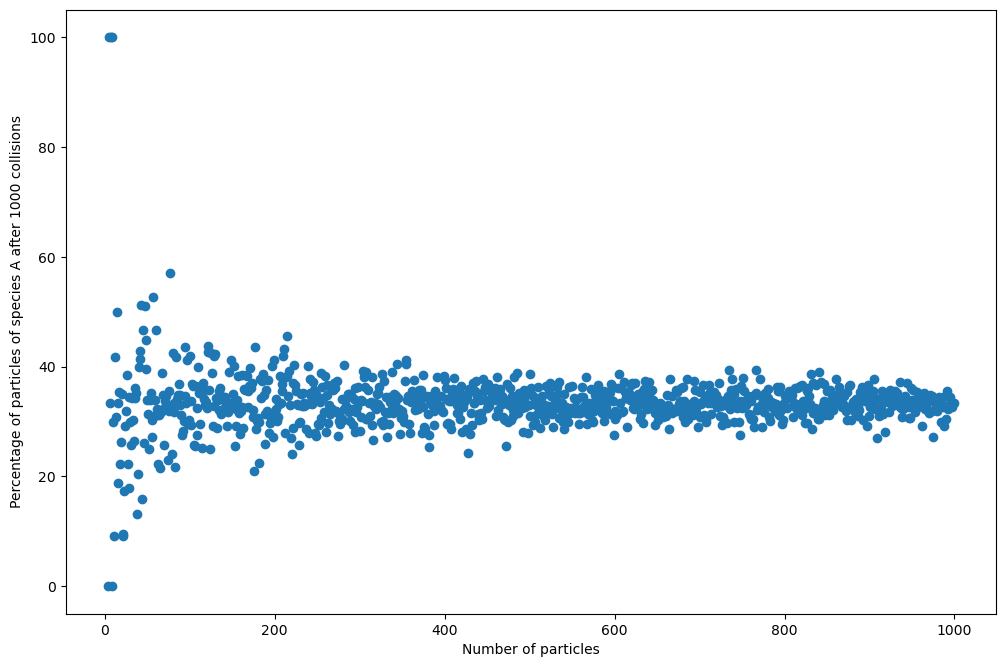

In [13]:
x=np.zeros(996)
for i in range(4,1000):
    x[i-4]=i

y=np.zeros(996)
for i in range(996):
    y[i]=results[i][0]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Number of particles")
plt.ylabel("Percentage of particles of species A after 1000 collisions")
plt.scatter(x,y)
plt.show()

Next I investigate the impact of changing the initial proprotion of each of the species of particles. To do this I vary the number of particles of species A to start, with species B and C evenly making up the remaining particles. I then find the number of particles of species A after every collision, up to C=1000. 

In [14]:
no_A=10 
no_B=1000-int(no_A/2)
particles=np.zeros(1000)
for k in range (1000):
        if (k<int (no_A)):
            particles[k]=1
        if ((k>int(no_A)) and (k<no_A+no_B)):
            particles[k]=2
        if (k>=int(no_A+no_B)):
            particles[k]=3

results=np.zeros(1000)
for i in range(1000):
    no_1s=0
    var_1=np.random.randint(0,1000)
    store=particles[var_1]
    particles[var_1]=-1
    var_2=np.random.randint(0,1000)
    while (particles[var_2]==-1):
        var_2=np.random.randint(0,1000)
    particles[var_1]=store
    if ((particles[var_1]+particles[var_2])%3==1):
        particles[var_1]=2
        particles[var_2]=2
    if ((particles[var_1]+particles[var_2])%3==0):
        particles[var_1]=3
        particles[var_2]=3
    if ((particles[var_1]+particles[var_2])%3==2):
        particles[var_1]=1
        particles[var_2]=1
    for j in range(1000):
        if (particles[j]==1):
            no_1s=no_1s+1
    results[i]=no_1s

print("The evolution of the number of particles of species A throughout 1000 collisions is: " ,results)


The evolution of the number of particles of species A throughout 1000 collisions is:  [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  

Using the previous function, I investigate the impact of changing the initial proportion of particles of species A on the distribution of particles of species A as collisions occur. 

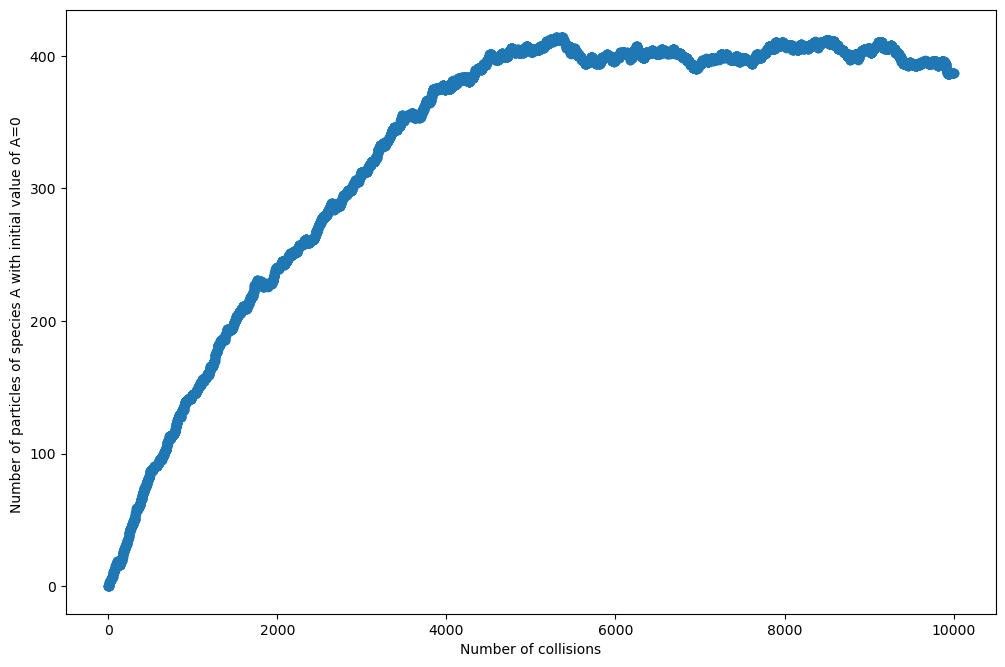

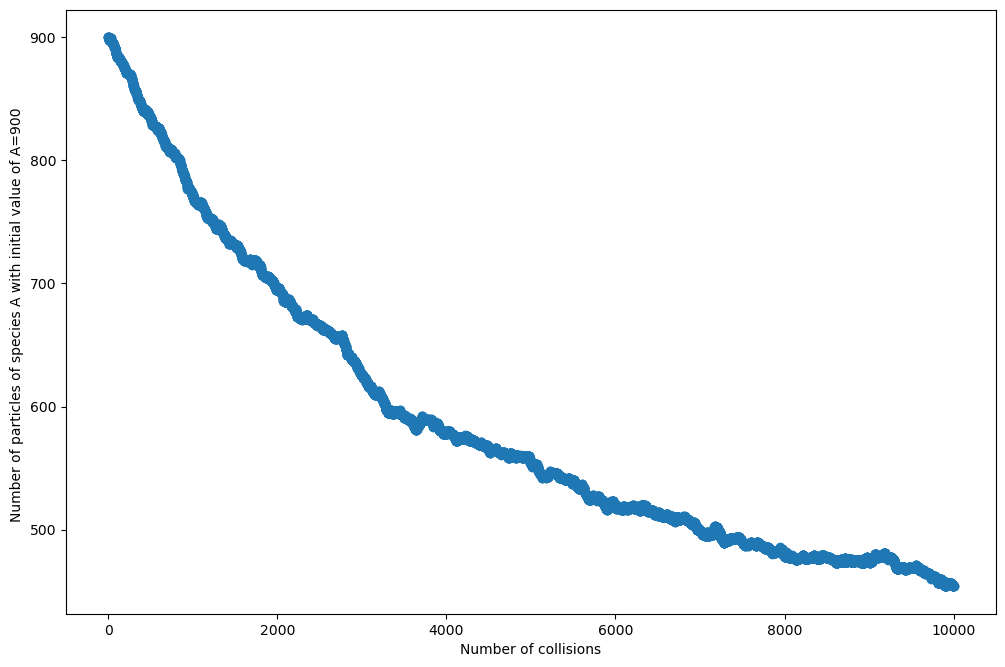

In [15]:
def prop(n,k,prop):
    no_A=prop
    no_B=1000-int(no_A/2)
    particles=np.zeros(n)
    for m in range (n):
        if (m<int (no_A)):
            particles[m]=1
        if ((m>int(no_A)) and (m<no_A+no_B)):
           particles[m]=2
        if (m>=int(no_A+no_B)):
            particles[m]=3

    results=np.zeros(k)
    for i in range(k):
        no_1s=0
        var_1=np.random.randint(0,n)
        store=particles[var_1]
        particles[var_1]=-1
        var_2=np.random.randint(0,n)
        while (particles[var_2]==-1):
           var_2=np.random.randint(0,n)
        particles[var_1]=store
        if ((particles[var_1]+particles[var_2])%3==1):
           particles[var_1]=2
           particles[var_2]=2
        if ((particles[var_1]+particles[var_2])%3==0):
           particles[var_1]=3
           particles[var_2]=3
        if ((particles[var_1]+particles[var_2])%3==2):
           particles[var_1]=1
           particles[var_2]=1
        for j in range(1000):
           if (particles[j]==1):
               no_1s=no_1s+1
        results[i]=no_1s
    return results



value_0=prop(10000,10000,0)
value_900=prop(10000,10000,900)

x=np.zeros(10000)
for i in range(10000):
    x[i]=i


fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Number of collisions")
plt.ylabel("Number of particles of species A with initial value of A=0 ")
plt.scatter(x,value_0)
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Number of collisions")
plt.ylabel("Number of particles of species A with initial value of A=900 ")
plt.scatter(x,value_900)
plt.show()

x=np.zeros(1000)
for i in range(1000):
    x[i]=i

all_proportions=np.zeros(1000)
for k in range(1000):
    res=prop(1000,1000,k)
    all_proportions[k]=res[999]



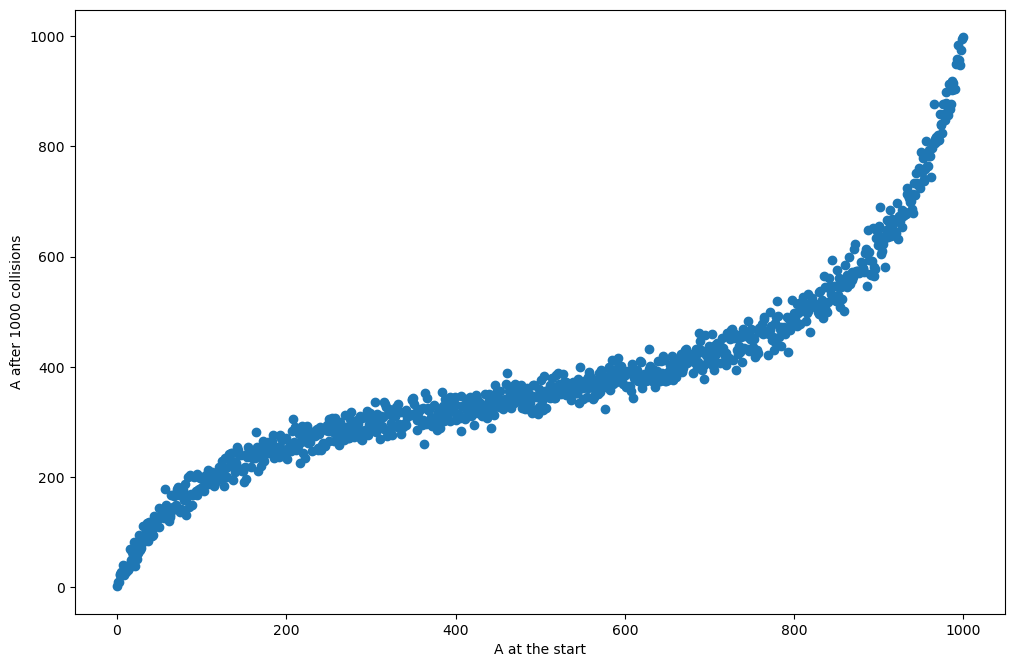

In [16]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("A at the start")
plt.ylabel("A after 1000 collisions")
plt.scatter(x,all_proportions)
plt.show()

I adapt my function so I gain more information- after each collision I find the distribution of the species of particles. This allows me to analyse the evolution of the distribution of the species of particles with different initial proportions of values of species A (and symmetrically B and C).

In [17]:

def collisions(n,k):
   particles_A=np.zeros(k)
   store=0
   particles=np.zeros(n)
   for i in range (n): 
      if (i<int(3*n/4)):
         particles[i]=1
      if (i>=int(3*n/4)and i<int (7*n/8)):
         particles[i]=2
      if (i>=int (7*n/8)):
         particles[i]=3
   
     
   no_1s=0
   no_2s=0
   no_3s=0
   for i in range(k):
      var_1=np.random.randint(0,n)
      store=particles[var_1]
      particles[var_1]=-1
      var_2=np.random.randint(0,n)
      while (particles[var_2]==-1):
         var_2=np.random.randint(0,n)
      particles[var_1]=store
      if ((particles[var_1]+particles[var_2])%3==1):
         particles[var_1]=2
         particles[var_2]=2
      if ((particles[var_1]+particles[var_2])%3==0):
         particles[var_1]=3
         particles[var_2]=3
      if ((particles[var_1]+particles[var_2])%3==2):
         particles[var_1]=1
         particles[var_2]=1
      for m in range(n):
        if (particles[m]==1):
            no_1s=no_1s+1
            
      particles_A[i]=no_1s
     

      no_1s=0 

   for i in range(n):
      if (particles[i]==3):
         no_3s=no_3s+1
      if (particles[i]==1):
         no_1s=no_1s+1
      if (particles[i]==2):
         no_2s=no_2s+1
    
   
   return no_1s, no_2s, no_3s, particles_A



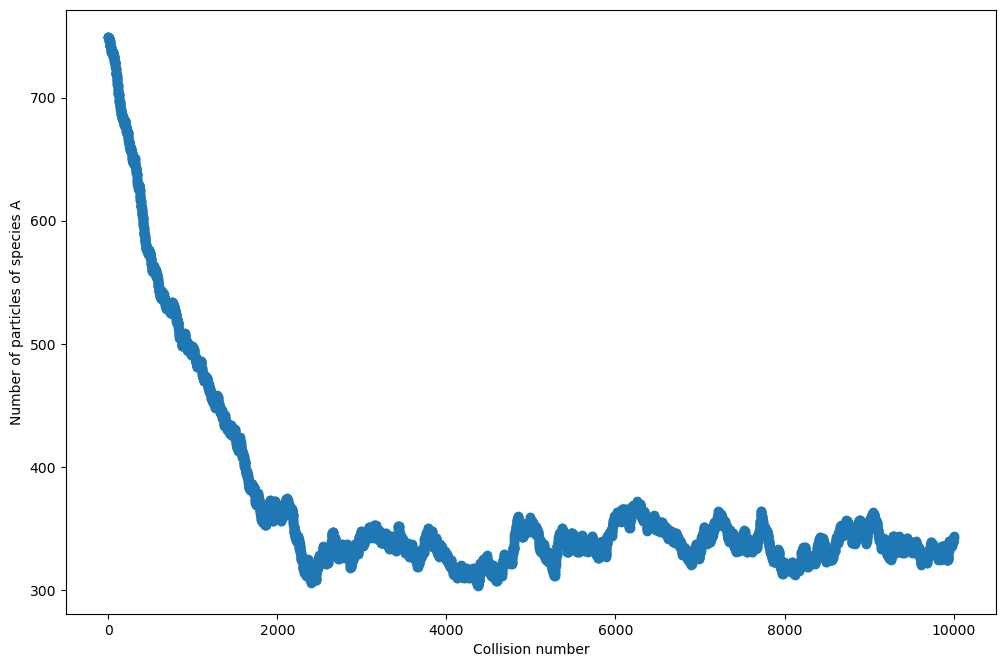

In [18]:
A,B,C, particles_A=collisions(1000,10000)

x=np.zeros(10000)
for i in range(10000):
    x[i]=i
y=np.zeros(10000)
for i in range(10000):
    y[i]=particles_A[i]
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Collision number")
plt.ylabel("Number of particles of species A")
plt.scatter(x, y)
plt.show()

I produce an animation to show the evolution of the number of particles of species A with different starting values for A.

In [19]:
no_A=10 
no_B=1000-int(no_A/2)
particles=np.zeros(1000)

for k in range (1000):
        if (k<int (no_A)):
            particles[k]=1
        if ((k>int(no_A)) and (k<no_A+no_B)):
            particles[k]=2
        if (k>=int(no_A+no_B)):
            particles[k]=3

results=np.zeros(1000)
for i in range(1000):
    no_1s=0
    var_1=np.random.randint(0,1000)
    store=particles[var_1]
    particles[var_1]=-1
    var_2=np.random.randint(0,1000)
    while (particles[var_2]==-1):
        var_2=np.random.randint(0,1000)
    particles[var_1]=store
    if ((particles[var_1]+particles[var_2])%3==1):
        particles[var_1]=2
        particles[var_2]=2
    if ((particles[var_1]+particles[var_2])%3==0):
        particles[var_1]=3
        particles[var_2]=3
    if ((particles[var_1]+particles[var_2])%3==2):
        particles[var_1]=1
        particles[var_2]=1
    for j in range(1000):
        if (particles[j]==1):
            no_1s=no_1s+1
    results[i]=no_1s

print(" The evolution is" ,results)


 The evolution is [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  9.  9.  9.  9.  9.  9.  9.  9.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib
plt.rcParams.update({'font.size': 12})
h = 1
kmax = 1000
K = np.arange(0,1000+h, h)
X = np.linspace(0, 1000, 1000)

def f(k):
    no_B=1000-int(k/2)
    particles=np.zeros(1000)
    for i in range (1000):
        if (i<int (k)):
            particles[i]=1
        if ((i>int(k)) and (i<k+no_B)):
            particles[i]=2
        if (i>=int(k+no_B)):
            particles[i]=3
    results=np.zeros(1000)
    for i in range(1000):
        no_1s=0
        var_1=np.random.randint(0,1000)
        store=particles[var_1]
        particles[var_1]=-1
        var_2=np.random.randint(0,1000)
        while (particles[var_2]==-1):
            var_2=np.random.randint(0,1000)
        particles[var_1]=store   
        if ((particles[var_1]+particles[var_2])%3==1):
            particles[var_1]=2
            particles[var_2]=2
        if ((particles[var_1]+particles[var_2])%3==0):
            particles[var_1]=3
            particles[var_2]=3
        if ((particles[var_1]+particles[var_2])%3==2):
            particles[var_1]=1
            particles[var_2]=1
        for j in range(1000):
            if (particles[j]==1):
                no_1s=no_1s+1
        results[i]=no_1s
   

    return results
fig = plt.figure()
ax = fig.add_subplot(111, xlim=(0, 1000),
ylim=(0, 1000))
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')
ax.set_title('')
ax.grid()
curve, = ax.plot([], [], 'b-', lw=3)
text = '$k$ = %.1f'
kval = ax.text(0.1, 1.1, '')
def animate_frame(i):
    curve.set_data(X, f(K[i]))
    kval.set_text(text % (i*h))
    return curve, kval

ani = FuncAnimation(fig, animate_frame,
frames = np.arange(0, len(K)),
interval = 50)
ani.save('project.mp4')
plt.show()


Using matplotlib backend: MacOSX


Next, I want to investigate what we observe when we vary the initial proportion of particles of each species. I set the initial proportion of species A as 1/2, with the B and C each having proportion 1/4. Then, for P varying up to 1000, I find the number of collisions required to achieve approximately equal distribution of the species of particles. I take this to mean that between 32 and 35% of the particles are of each of the species.

In [21]:
number_required_collisions=np.zeros(996)
for i in range(4,1000): 
    particles=np.zeros(i)
    for k in range (i):
        if (k<=int (1*i/10)):
            particles[k]=3
        if ((k>int(1*i/10)) and (k<int(2*i/10))):
            particles[k]=2
        if (k>=int(2*i/5)):
            particles[k]=1
    count=0
    count_true=0
    equal=False
    while ((equal ==False) and (count<1000)): 
        no_1s=0
        no_2s=0
        no_3s=0
        count=count+1
        var_1=np.random.randint(0,i)
        store=particles[var_1]
        particles[var_1]=-1
        var_2=np.random.randint(0,i)
        while (particles[var_2]==-1):
           var_2=np.random.randint(0,i)
        particles[var_1]=store
        if ((particles[var_1]+particles[var_2])%3==1):
           particles[var_1]=2
           particles[var_2]=2
        if ((particles[var_1]+particles[var_2])%3==0):
           particles[var_1]=3
           particles[var_2]=3
        if ((particles[var_1]+particles[var_2])%3==2):
           particles[var_1]=1
           particles[var_2]=1
        for m in range(i):
            if (particles[m]==3):
                no_3s=no_3s+1
            if (particles[m]==1):
                no_1s=no_1s+1
            if (particles[m]==2):
                no_2s=no_2s+1
        if ((0.32*i<no_1s<0.35*i) and (0.32*i<no_2s<0.35*i) and (0.32*i<no_3s<0.35*i)):
            count_true=count_true+1
        if (count_true==1):
            equal= True     
    number_required_collisions[i-4]=count   

x=np.zeros(996)
y=np.zeros(996)
for i in range(4,1000):
    x[i-4]=i
    y[i-4]=number_required_collisions[i-4]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Number of particles")
plt.ylabel("Number of collisions required for roughly even distribution")
plt.scatter(x,y)
plt.show()



    

As an extension, I adapt my initial program so I have 4 species of particles. 

In [22]:
def collisions(n,k):
   store=0
   particles=np.zeros(n)
   for i in range (n): 
      particles[i]=np.random.randint(1,5)
     
   no_1s=0
   no_2s=0
   no_3s=0
   no_4s=0
   for i in range(k):
      var_1=np.random.randint(0,n)
      store=particles[var_1]
      particles[var_1]=-1
      var_2=np.random.randint(0,n)
      while (particles[var_2]==-1):
         var_2=np.random.randint(0,n)
      particles[var_1]=store
      if (((particles[var_1]==1) and (particles[var_2]==2)) or ((particles[var_1]==2) and (particles[var_2]==1))):
         new=np.random.randint(3,5)
         particles[var_1]=new
         particles[var_2]=new
      if (((particles[var_1]==1) and (particles[var_2]==3)) or ((particles[var_1]==3) and (particles[var_2]==1))):
         new=np.random.randint(2,5)
         while (new==3):
            new=np.random.randint(2,5)
         particles[var_1]=new
         particles[var_2]=new
      if (((particles[var_1]==1) and (particles[var_2]==4)) or ((particles[var_1]==4) and (particles[var_2]==1))):
         new=np.random.randint(2,4)
         particles[var_1]=new
         particles[var_2]=new
      if (((particles[var_1]==2) and (particles[var_2]==3)) or ((particles[var_1]==3) and (particles[var_2]==2))):
         new=np.random.randint(1,5)
         while ((new==3) or (new==2)):
            new=np.random.randint(1,5)
         particles[var_1]=new
         particles[var_2]=new
      if (((particles[var_1]==2) and (particles[var_2]==4)) or ((particles[var_1]==4) and (particles[var_2]==2))):
         new=np.random.randint(1,4)
         while ((new==2)):
            new=np.random.randint(1,4)
         particles[var_1]=new
         particles[var_2]=new
      if (((particles[var_1]==3) and (particles[var_2]==4)) or ((particles[var_1]==4) and (particles[var_2]==3))):
         new=np.random.randint(1,3)
         particles[var_1]=new
         particles[var_2]=new
      
     

   for i in range(n):
      if (particles[i]==3):
         no_3s=no_3s+1
      if (particles[i]==1):
         no_1s=no_1s+1
      if (particles[i]==2):
         no_2s=no_2s+1
      if (particles[i]==4):
         no_4s=no_4s+1
   
   return no_1s, no_2s, no_3s, no_4s

I again start investigating in the simplified case where P=4.

In [23]:
total_1s, total_2s, total_3s, total_4s=collisions(4,100)  
print("Totals of species A,B,C,D after 1000 collisions: " ,total_1s, total_2s, total_3s,total_4s)


Totals of species A,B,C,D after 1000 collisions:  4 0 0 0


In [24]:
number_not_converge=0
for i in range(1000):
    Not_converge=False
    ones,twos,threes, fours=collisions(4,125)
    if (ones<4):
        Not_converge=True
        number_not_converge=number_not_converge+1

print("Trials with no convergence: " ,number_not_converge)

Trials with no convergence:  784


In [25]:
results=np.zeros(200)
converge_A=np.zeros(200)
converge_B=np.zeros(200)
converge_C=np.zeros(200)
converge_D=np.zeros(200)
for k in range (1,200): 
    number_not_converge=0
   
    for i in range(1000):
      Not_converge=False
      ones,twos,threes, fours=collisions(4,k)
      if (ones==4):
         converge_A[k]=converge_A[k]+1
      if (twos==4):
         converge_B[k]=converge_B[k]+1
      if (threes==4):
         converge_C[k]=converge_C[k]+1
      if (fours==4):
         converge_D[k]=converge_D[k]+1
      if ((ones<4) and (twos<4) and (threes<4) and (fours<4)):
        Not_converge=True
        number_not_converge=number_not_converge+1
    results[k]=number_not_converge/10

print("Converged to A, B, C, D: " ,converge_A, converge_B, converge_C, converge_D)

x=np.zeros(200)
for i in range(1,200):
    x[i]=i

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Number of collisions")
plt.ylabel("Percentage of trials of x number of collisions with no convergence")
plt.scatter(x,results)
plt.show()

Converged to A, B, C, D:  [  0.  15.  26.  31.  31.  37.  53.  62.  63.  74.  74.  77. 101.  74.
 109. 114. 107. 109. 127. 120. 129. 146. 146. 142. 153. 142. 151. 161.
 169. 164. 146. 170. 160. 168. 175. 163. 186. 181. 186. 203. 212. 216.
 198. 218. 192. 209. 194. 185. 218. 208. 219. 187. 214. 208. 202. 212.
 208. 227. 206. 207. 221. 212. 225. 236. 226. 207. 232. 245. 241. 221.
 241. 238. 250. 242. 223. 235. 239. 234. 230. 248. 240. 249. 251. 236.
 231. 218. 213. 232. 238. 229. 252. 220. 250. 237. 233. 227. 215. 237.
 230. 222. 227. 235. 227. 241. 238. 247. 248. 241. 238. 268. 238. 237.
 256. 229. 255. 236. 252. 255. 240. 236. 253. 242. 238. 232. 244. 239.
 254. 227. 233. 252. 235. 268. 236. 257. 241. 218. 240. 264. 257. 273.
 242. 238. 248. 242. 252. 240. 257. 252. 273. 225. 243. 246. 257. 277.
 235. 240. 256. 251. 295. 239. 266. 233. 273. 234. 217. 242. 241. 250.
 253. 226. 250. 230. 254. 242. 231. 255. 249. 263. 242. 244. 261. 238.
 260. 246. 239. 257. 247. 275. 242. 245. 231. 214. 

I again investigate how increasing P impacts the distribution of each species of particles.

In [26]:
results=np.zeros((9996,4))
for i in range(4,1000):
    no_1s,no_2s, no_3s,no_4s=collisions(i,1000) 
    results[i-4][0]=(no_1s/i)*100
    results[i-4][1]=(no_2s/i)*100
    results[i-4][2]=(no_3s/i)*100
    results[i-4][3]=(no_3s/i)*100

In [27]:
x=np.zeros(996)
for i in range(4,1000):
    x[i-4]=i

y=np.zeros(996)
for i in range(996):
    y[i]=results[i][0]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Number of particles")
plt.ylabel("Percentage of particles of species A after 1000 collisions")
plt.scatter(x,y)
plt.show()

As an extension, I adapted the experiment so that if particles of species A and C collide, they turn into a single particle of species D. 

In [28]:
import numpy as np
def collisions(n,k):
   store=0
   particles=np.zeros(n)
   for i in range (n): 
      particles[i]=np.random.randint(1,4)
     
   no_1s=0
   no_2s=0
   no_3s=0
   no_4s=0
   for i in range(k):
      var_1=np.random.randint(0,n)
      while (particles[var_1]==-2):
         var_1=np.random.randint(0,n)
      store=particles[var_1]
      particles[var_1]=-1
      var_2=np.random.randint(0,n)
      while ((particles[var_2]==-1) or (particles[var_2]==-2)):
         var_2=np.random.randint(0,n)
      particles[var_1]=store
      if ((particles[var_1]+particles[var_2])==4 and (particles[var_1]<4) and (particles[var_2]<4)):
         particles[var_1]=-2
         particles[var_2]=4
      if ((particles[var_1]+particles[var_2])==3 and (particles[var_1]<4) and (particles[var_2]<4)):
         particles[var_1]=3
         particles[var_2]=3
      if (((particles[var_1]+particles[var_2])==5) and (particles[var_1]<4) and (particles[var_2]<4)):
         particles[var_1]=1
         particles[var_2]=1

   for i in range(n):
      if (particles[i]==3):
         no_3s=no_3s+1
      if (particles[i]==1):
         no_1s=no_1s+1
      if (particles[i]==2):
         no_2s=no_2s+1
      if (particles[i]==4):
         no_4s=no_4s+1
   
   return no_1s, no_2s, no_3s, no_4s

I fix P=C=100000 and for 100 trials find the number of each species of particle after C collisions.

In [29]:
sum_a=0
sum_b=0
sum_c=0
sum_d=0

for i in range(100):
    no_as,no_bs,no_cs,no_ds=collisions(100000,100000)
    sum_a=sum_a+no_as
    sum_b=sum_b+no_bs
    sum_c=sum_c+no_cs
    sum_d=sum_d+no_ds

total=sum_a+ sum_b +sum_c+sum_d
print("Average number A: " ,sum_a/100)
print("Average number B: " ,sum_b/100)
print("Average number C: " ,sum_c/100)
print("Average number D: " ,sum_d/100)
print(sum_a/100 + sum_b/100 +sum_c/100+sum_d/100)



Average number A:  22115.55
Average number B:  4875.53
Average number C:  22083.6
Average number D:  25462.66
74537.34


Varying C up to 1000000, I find the percentage of each species of particles and the total number of particles. I produce plots of my results.

In [30]:


no_collisions=np.zeros(1000)
results_collisions=np.zeros(1000)
results_A=np.zeros(1000)
results_B=np.zeros(1000)
results_C=np.zeros(1000)
results_D=np.zeros(1000)

for i in range(1000):
    no_collisions[i]=20*(i+1)
    no_as,no_bs,no_cs,no_ds=collisions(100000,int(no_collisions[i]))
    results_collisions[i]=no_as+no_bs+no_cs+no_ds
    results_A[i]=no_as/results_collisions[i]*100
    results_B[i]=no_bs/results_collisions[i]*100
    results_C[i]=no_cs/results_collisions[i]*100
    results_D[i]=no_ds/results_collisions[i]*100

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Collision number")
plt.ylabel("Number of particles")
print(results_collisions)
plt.scatter(no_collisions, results_collisions)
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Collision number")
plt.ylabel("Percentage of particles of species A")
print(results_collisions)
plt.scatter(no_collisions, results_A)
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Collision number")
plt.ylabel("Percentage of particles of species B")
print(results_collisions)
plt.scatter(no_collisions, results_B)
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Collision number")
plt.ylabel("Percentage of particles of species C")
print(results_collisions)
plt.scatter(no_collisions, results_C)
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Collision number")
plt.ylabel("Percentage of particles of species D")
print(results_collisions)
plt.scatter(no_collisions, results_D)
plt.show()

[99994. 99991. 99977. 99965. 99971. 99966. 99950. 99954. 99931. 99936.
 99925. 99926. 99910. 99903. 99904. 99896. 99863. 99884. 99879. 99852.
 99851. 99861. 99839. 99847. 99823. 99855. 99806. 99831. 99805. 99795.
 99797. 99780. 99786. 99790. 99758. 99763. 99761. 99734. 99735. 99744.
 99741. 99731. 99704. 99710. 99712. 99693. 99679. 99695. 99654. 99670.
 99667. 99699. 99632. 99628. 99645. 99603. 99623. 99627. 99611. 99614.
 99581. 99592. 99610. 99563. 99551. 99553. 99560. 99551. 99512. 99505.
 99533. 99554. 99540. 99483. 99508. 99452. 99482. 99522. 99485. 99500.
 99453. 99434. 99442. 99416. 99460. 99410. 99440. 99439. 99424. 99422.
 99390. 99418. 99394. 99367. 99390. 99315. 99358. 99369. 99373. 99374.
 99332. 99303. 99333. 99316. 99302. 99294. 99260. 99319. 99278. 99255.
 99277. 99293. 99280. 99236. 99205. 99230. 99209. 99235. 99222. 99222.
 99184. 99202. 99185. 99194. 99165. 99224. 99171. 99138. 99158. 99159.
 99163. 99137. 99091. 99126. 99084. 99116. 99062. 99066. 99098. 99073.
 99069

I fit curves to my results.

In [31]:
from scipy.optimize import curve_fit
def linear(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * (x**2) + b*x+c


est, _ = curve_fit(linear, no_collisions, results_collisions)
print(est)
fit=np.zeros(1000)
plt.scatter(no_collisions, results_collisions)
for i in range(1000):
    fit[i]=est[1]+est[0]*no_collisions[i]
plt.scatter(no_collisions, fit)
plt.show()





[-3.14579734e-01  9.99411881e+04]
[-2.08817524e-09  1.11831185e-04  3.33260525e+01]
